### <font color="Indigo"><h1 align="center">E-Commerce Sales Analysis</h1></font>

## <font color='indigo'><h4>Importing Necessary Libraries</h4></font>
#### If these libraries are not installed in your system, You can install them by `pip install <library name>` e.g: `pip install numpy` on cmd or just install `Anaconda`, Everything will be installed along with it.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For "A value is trying to be set on a copy of a slice from a DataFrame." Warning.
pd.options.mode.chained_assignment = None

## <font color='#B32133'><h2>Part 1</h2></font>
### <font color="indigo"><h3>Loading Dataset</h3></font>

#### I tended to face a problem for loading dataset into notebook, there was some encoding problem with dataset therefore system was unable to load, I found this alternative of using `encoding = unicode_escape`.

<font><h5>You can look further on this in link below if interested:</h5></font>
<font><h5><a>https://stackoverflow.com/questions/22216076/unicodedecodeerror-utf8-codec-cant-decode-byte-0xa5-in-position-0-invalid-s</a></h5></font>

In [2]:
df = pd.read_csv('./Data/data.csv', encoding= 'unicode_escape')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


### <font color='indigo'><h4>Some Details About Dataset</h4></font>

In [3]:
df.shape

(541909, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## <font color='#B32133'><h2>Part 2</h2></font>

### <font color='indigo'><h3>Data Cleaning</h3></font>
#### As we all know that data is never perfect, as a Data analyst it's our job to make the data useful as per job. This data is messy and contains `NAN`, `Negative` and some other outlyers which needs to be cleaned.

In [6]:
# For Backup Purpose
new_df = df

### <font color='indigo'><h4>Finding NaN Values</h4></font>

In [7]:
new_df.isna().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64

### <font color='indigo'><h4>Cleaning/Droping NaN Values</h4></font>
#### Though, there's no way to fill these NaN values with proper values therefore we'll need to drop them considering 541909 being total rows, we'll still have good amount of data left for our  `Analysis`.

In [8]:
new_df.dropna(inplace=True)
new_df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### <font color="Indigo"><h4>Getting rid of Negative values in Quantity</h4></font>
<font><h5>Note: Because Quantity can't be Negative right?</h5></font>

In [9]:
# Negative Values
new_df[new_df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [10]:
# Removing Negative Values
new_df = new_df[~new_df['Quantity']<0]

### <font color="Indigo"><h4>Re-setting Index and Droping previous</h4></font>

In [11]:
new_df.reset_index(inplace=True,drop=True)

### <font color="Indigo"><h4>Converting Data columns into right DataType</h4></font>

In [12]:
# Checking DataTypes of Columns
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397924 non-null  object 
 1   StockCode    397924 non-null  object 
 2   Description  397924 non-null  object 
 3   Quantity     397924 non-null  int64  
 4   InvoiceDate  397924 non-null  object 
 5   UnitPrice    397924 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      397924 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 24.3+ MB


#### <font color="Indigo"><h4>InvoiceNo and CustomerID into INT Type</h4></font>

In [13]:
new_df['InvoiceNo'] = new_df['InvoiceNo'].astype('int64')
new_df['CustomerID'] = new_df['CustomerID'].astype('int64')

#### <font color="Indigo"><h4>InvoiceDate Column into DateTimeStamp</h4></font>

In [14]:
new_df['InvoiceDate'] = pd.to_datetime(new_df['InvoiceDate'])

#### <font color="Indigo"><h4>Changing Description column values to lower Case</h4></font>

In [15]:
new_df['Description'] = new_df['Description'].apply(lambda x: x.lower())

In [16]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  int64         
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  int64         
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 24.3+ MB


In [17]:
new_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
397919,581587,22613,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,France
397920,581587,22899,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,France
397921,581587,23254,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,France
397922,581587,23255,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,France


<font><h3>I guess thats enough!</h3></font>

## <font color='#B32133'><h2>Part 3</h2></font>

### <font color='indigo'><h3>Adding Some Necessary Columns</h3></font>

- <font><h5>Year</h5><font>
- <font><h5>Month</h5><font>
- <font><h5>Hour</h5><font>
- <font><h5>Sales</h5><font>

- <font color="indigo"><h3>Year</h3><font>

In [18]:
new_df['Year'] = new_df['InvoiceDate'].dt.year

- <font color="indigo"><h3>Month</h3><font>

In [19]:
new_df['Month'] = new_df['InvoiceDate'].dt.month

- <font color="indigo"><h3>Hour</h3><font>

In [20]:
new_df['Hour'] = new_df['InvoiceDate'].dt.hour

- <font color="indigo"><h3>Sales</h3><font>

In [21]:
new_df['Sales'] = new_df['Quantity'] * new_df['UnitPrice']

## <font color='#B32133'><h2>Part 4</h2></font>

### <font color="Indigo"><h3>Data Exploration (Most Important)</h3></font>

### <font color='#B32133'><h4>This section/part is most Important part of any `Analysis`, in this section we'll answer some business questions below.</h4></font>
### 1. Which country made the most sale?
### 2. In which country we sold the most products?
### 3. Comparing both years 2010 & 2011 which year we earned the most & sold the most products?
### 4. What was the best month for sales in 2010 & 2011?
### 5. Sales trend of 2010 & 2011, is company growing or going in loss?

<font color="indigo"><h3>Some Necessary things before diving in</h3><font>

In [22]:
# Color Dictionary of Colors I used for Diagrams.
colors = {'Inkwell':'#363945',
          'Classic Blue':'#34568B',
          'Navy Blazer':'#282D3C',
          'Megenta red':'#A02133',
          'Evening Blue':'#2A293E',
          'Samba':'#A2242F'}

## <font color='#B32133'><h4>Q1. Which country made the most sale?</h4></font>

<font><h3>Now this question is not defined quiet clearly, I mean most sale in what? 2010, 2011 or overall? Therefore I answered this question in three ways:</h3></font>
- **2010**
- **2011**
- **Overall**

- <font color="indigo"><h3>2010</h3><font>

In [23]:
# Sales of 2010
sales_10 = new_df[new_df['Year'] == 2010]

# Grouping by Country, summing, extracting only sales column, sorting in descending and top 10 values
result_10 = sales_10.groupby('Country').sum()[['Sales']].sort_values('Sales',ascending=False).head(10)

- <font color="indigo"><h3>2011</h3><font>

In [24]:
# Sales of 2011
sales_11 = new_df[new_df['Year'] == 2011]

# Grouping by Country, summing, extracting only sales column, sorting in descending and top 10 values
result_11 = sales_11.groupby('Country').sum()[['Sales']].sort_values('Sales',ascending=False).head(10)

- <font color="indigo"><h3>Overall</h3><font>

In [25]:
# Again same thing as above.
overall = new_df.groupby('Country').sum()[['Sales']].sort_values('Sales',ascending=False).head(10)

- <font color="indigo"><h3>Visualization</h3><font>

In [26]:
# For Graph Style
plt.style.use('ggplot')

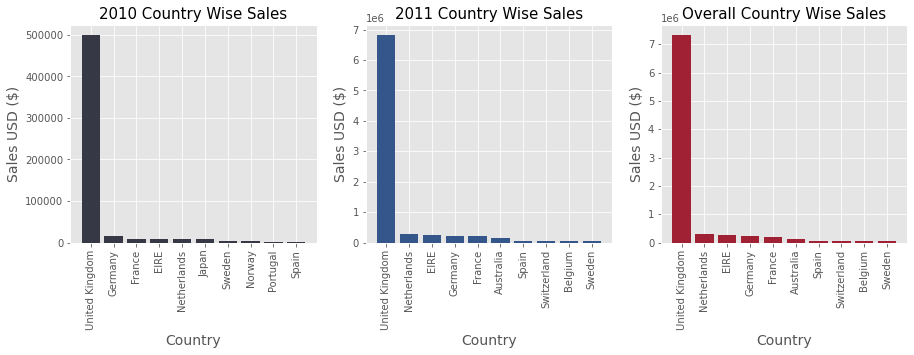

In [27]:
# Subplots
figure, axis = plt.subplots(1,3,figsize=(15,4))
       
# For 2010 sale
axis[0].bar(result_10.index,result_10['Sales'],color = colors['Inkwell'])
axis[0].set_title('2010 Country Wise Sales',size=15)
axis[0].set_xlabel('Country',size=14)
axis[0].set_ylabel('Sales USD ($)',size=14)
axis[0].set_xticklabels(result_10.index,rotation='vertical');

# For 2011 sale
axis[1].bar(result_11.index,result_11['Sales'],color = colors['Classic Blue'])
axis[1].set_title('2011 Country Wise Sales',size=15)
axis[1].set_xlabel('Country',size=14)
axis[1].set_ylabel('Sales USD ($)',size=14)
axis[1].set_xticklabels(result_11.index,rotation='vertical');

# For Overall sale
axis[2].bar(overall.index,overall['Sales'],color = colors['Megenta red'])
axis[2].set_title('Overall Country Wise Sales',size=15)
axis[2].set_xlabel('Country',size=14)
axis[2].set_ylabel('Sales USD ($)',size=14)
axis[2].set_xticklabels(overall.index,rotation='vertical');

### <font color="#34568B"><h4>Answer: As from above Charts we can say that "United Kingdom" was where company made the most sales from. Making about:</h4></font>
- <font color="#363945"><h4>2010: 498661.85 USD</h4></font>
- <font color="#34568B"><h4>2011: 6809730.704 USD</h4></font>
- <font color="#A02133"><h3>Overall: 7308392.554 USD</h3></font>

## <font color='#B32133'><h4>Q2. In which country we sold the most products?</h4></font>

<font><h3>Till now I think you would have gotten idea, how are we going to solve this too:</h3></font>
- **2010**
- **2011**
- **Overall**

- <font color="indigo"><h3>2010</h3><font>

In [28]:
# Sales of 2010
sales_10 = new_df[new_df['Year'] == 2010]

# Grouping by Country, summing, extracting only sales column, sorting in descending and top 10 values
result_10 = sales_10.groupby('Country').sum()[['Quantity']].sort_values('Quantity',ascending=False).head(10)

- <font color="indigo"><h3>2011</h3><font>

In [29]:
# Sales of 2011
sales_11 = new_df[new_df['Year'] == 2011]

# Grouping by Country, summing, extracting only sales column, sorting in descending and top 10 values
result_11 = sales_11.groupby('Country').sum()[['Quantity']].sort_values('Quantity',ascending=False).head(10)

- <font color="indigo"><h3>Overall</h3><font>

In [30]:
# Again same thing as above.
overall = new_df.groupby('Country').sum()[['Quantity']].sort_values('Quantity',ascending=False).head(10)

- <font color="indigo"><h3>Visualization</h3><font>

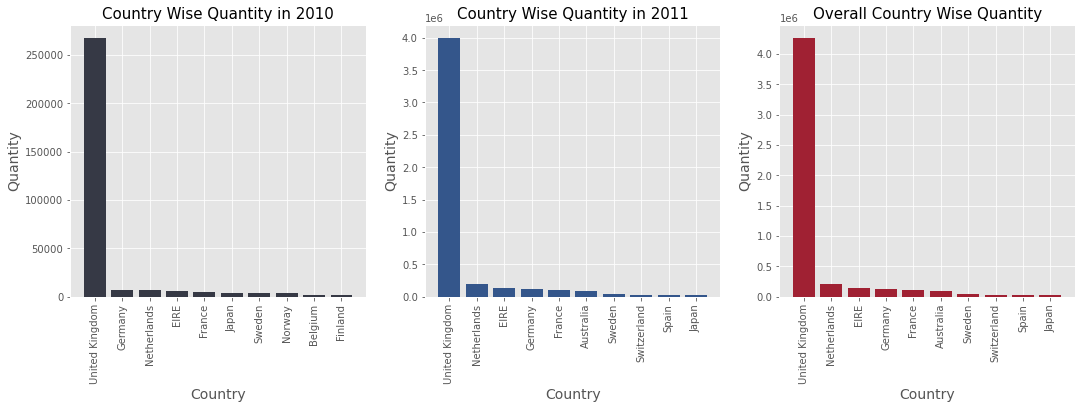

In [31]:
# for Subplots 
fig, axis = plt.subplots(1,3,figsize=(18,5))
       
# For 2010 sale
axis[0].bar(result_10.index,result_10['Quantity'],color = colors['Inkwell'])
axis[0].set_title('Country Wise Quantity in 2010',size=15)
axis[0].set_xlabel('Country',size=14)
axis[0].set_ylabel('Quantity',size=14)
axis[0].set_xticklabels(result_10.index,rotation='vertical');

# For 2011 sale
axis[1].bar(result_11.index,result_11['Quantity'],color = colors['Classic Blue'])
axis[1].set_title('Country Wise Quantity in 2011',size=15)
axis[1].set_xlabel('Country',size=14)
axis[1].set_ylabel('Quantity',size=14)
axis[1].set_xticklabels(result_11.index,rotation='vertical');

# For Overall sale
axis[2].bar(overall.index,overall['Quantity'],color = colors['Megenta red'])
axis[2].set_title('Overall Country Wise Quantity',size=15)
axis[2].set_xlabel('Country',size=14)
axis[2].set_ylabel('Quantity',size=14)
axis[2].set_xticklabels(overall.index,rotation='vertical');

### <font color="#34568B"><h4>Answer: As from above Charts we can say that "United Kingdom" was where company sold the most products, Selling about:</h4></font>
- <font color="#363945"><h4>2010: 267771 products</h4></font>
- <font color="#34568B"><h4>2011: 4001701 products</h4></font>
- <font color="#A02133"><h3>Overall: 4269472 products</h3></font>

## <font color='#B32133'><h4>Q3. Comparing both years 2010 & 2011, in which year company earned the most & sold the most products?</h4></font>

- <font color="indigo"><h3>Sales in 2010 & 2011</h3><font>

In [32]:
# For Sales of 2010 & 2011
sales = new_df.groupby("Year").sum()[['Sales']]
sales

,Sales
Year,
2010,5.727139e+05
2011,8.338694e+06


- <font color="indigo"><h3>Quantity of Sold Products in 2010 & 2011</h3><font>

In [33]:
# For Quantity of 2010 & 2011
quantity = new_df.groupby('Year').count()[['Quantity']]
quantity

,Quantity
Year,
2010,26160
2011,371764


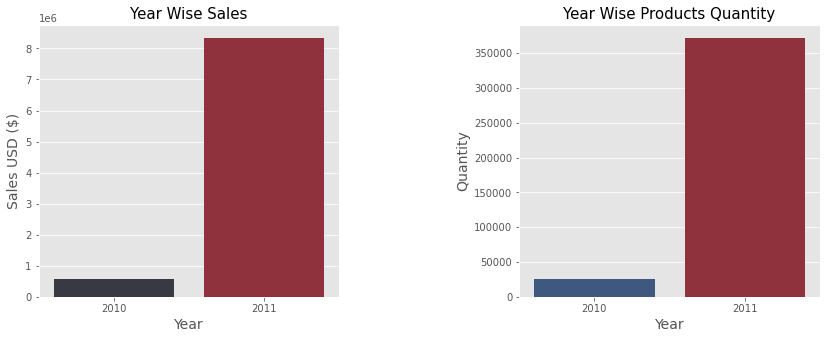

In [34]:
fig, axis = plt.subplots(1,2,figsize=(14,5))
plt.subplots_adjust(wspace=.6)

# For 2010 sale
sns.barplot(sales.index,sales['Sales'],palette=[colors['Inkwell'],colors['Megenta red']],ax=axis[0])
axis[0].set_title('Year Wise Sales',size=15)
axis[0].set_xlabel('Year',size=14)
axis[0].set_ylabel('Sales USD ($)',size=14)
axis[0].set_xticklabels(quantity.index);

# For 2011 sale
sns.barplot(quantity.index,quantity['Quantity'],palette=[colors['Classic Blue'],colors['Megenta red']],ax=axis[1])
axis[1].set_title('Year Wise Products Quantity',size=15)
axis[1].set_xlabel('Year',size=14)
axis[1].set_ylabel('Quantity',size=14)
axis[1].set_xticklabels(quantity.index);

### <font color="#34568B"><h4>Answer: As from above Charts we can say that in 2011 company made the most sales and sold most products earning & selling about:</h4></font>
- <font color="#363945"><h3>Sales: 8338694.23 USD</h3></font>
- <font color="#A02133"><h3>Quantity: 371764 Products</h3></font>

## <font color='#B32133'><h4>Q4. What was the best month for sales in 2010 & 2011?</h4></font>

- <font color="indigo"><h3>Sales in 2010</h3><font>

In [35]:
# For 2010 Sales
sales_10 = new_df[new_df['Year'] == 2010]
monthly_sales_10 = sales_10.groupby('Month').sum()[['Sales']]
monthly_sales_10

,Sales
Month,
12,572713.89


<font color="#363945"><h4>The reason it's only showing december sales is because our dataset contains data from 01/12/2010 to 09/12/2011, therefore I guess answer is going to be from only 2011 cause we don't have other months from 2010 sales.</h4></font>

- <font color="indigo"><h3>Sales in 2011</h3><font>

In [36]:
# For 2011 Sales
sales_11 = new_df[new_df['Year'] == 2011]
monthly_sales_11 = sales_11.groupby('Month').sum()[['Sales']]
monthly_sales_11

,Sales
Month,
1,569445.040
2,447137.350
3,595500.760
4,469200.361
5,678594.560
6,661213.690
7,600091.011
8,645343.900
9,952838.382


- <font color="indigo"><h3>Visualization</h3><font>

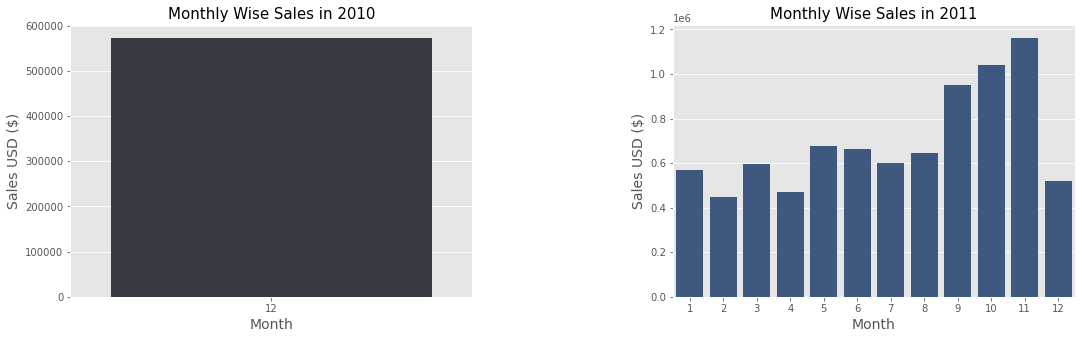

In [37]:
# for Subplots 
fig, axis = plt.subplots(1,2,figsize=(18,5))
plt.subplots_adjust(wspace=.5)
       
# For 2010 sale
sns.barplot(monthly_sales_10.index,monthly_sales_10['Sales'],color = colors['Inkwell'],ax=axis[0])
axis[0].set_title('Monthly Wise Sales in 2010',size=15)
axis[0].set_xlabel('Month',size=14)
axis[0].set_ylabel('Sales USD ($)',size=14)
axis[0].set_xticklabels(monthly_sales_10.index);

# For 2011 sale
sns.barplot(monthly_sales_11.index,monthly_sales_11['Sales'],color = colors['Classic Blue'],ax=axis[1])
axis[1].set_title('Monthly Wise Sales in 2011',size=15)
axis[1].set_xlabel('Month',size=14)
axis[1].set_ylabel('Sales USD ($)',size=14)
axis[1].set_xticklabels(monthly_sales_11.index);

### <font color="#34568B"><h4>Answer: According to question we had to find best Sales month in 2010 and 2011 but due to limited data we can only answer for year 2011, November was best Sales month in 2011 providing company sales about:</h4></font>
- <font color="#A02133"><h3>2011: 1161817.380 USD</h3></font>

## <font color='#B32133'><h4>Q5. Sales trend of 2010 & 2011.</h4></font>
<font><h4>Acknowledging that this dataset contains only december data from 2010, therefore Sales trend for 2010 is not possible that's why I only had choice to show Sales trend of 2011.</h4></font>

- <font color="indigo"><h3>Sales in 2011</h3><font>

In [38]:
# For 2011 Sales
sales_11 = new_df[new_df['Year'] == 2011]
monthly_sales_11 = sales_11.groupby('Month').sum()[['Sales']]
monthly_sales_11

,Sales
Month,
1,569445.040
2,447137.350
3,595500.760
4,469200.361
5,678594.560
6,661213.690
7,600091.011
8,645343.900
9,952838.382


#### <font color="Indigo"><h1 align="center">Sales Trend 2011</h1></font>

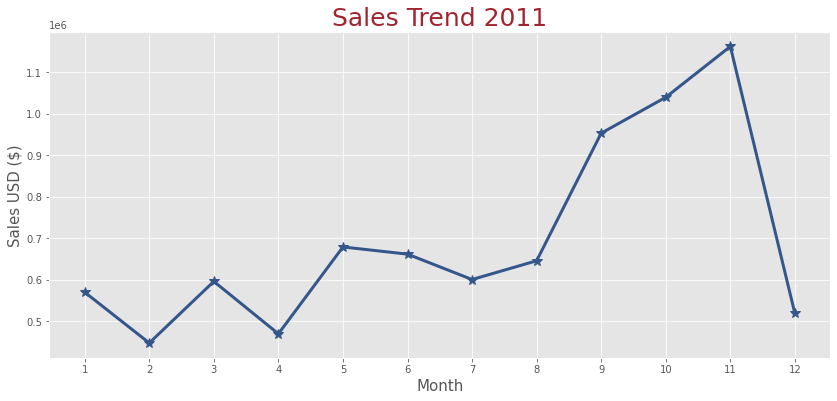

In [39]:
# Figure Size
plt.figure(figsize=(14,6))

# Drawing Line Chart
plt.plot(monthly_sales_11.index,monthly_sales_11['Sales'],linewidth=3,marker='*',markersize=10,color=colors['Classic Blue'])

# Title and Labels
plt.title("Sales Trend 2011",size=25,color=colors['Samba'])
plt.xlabel('Month',size=15)
plt.ylabel('Sales USD ($)',size=15)
plt.xticks(monthly_sales_11.index);

### <font color="#282D3C"><h4 align="Center">That's it Guys for this Analysis, I hope you guys enjoyed and learnt something from it like I did.</h4></font>
### <font color="#A02133"><h4 align="Center">Peace Out!</h4></font>